In [39]:
import pandas as pd
import numpy as np

from keras.layers.experimental import preprocessing
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Import data

In [52]:
FILE_PATH = './Data/output/'

df = pd.read_csv(FILE_PATH + 'Population_Schools_SDGs_Clean.csv', index_col=0)
df = df.dropna()
df.head()

,PSGC_BRGY,both_age_0_to_4,male_age_0_to_4,female_age_0_to_4,both_age_5_to_9,male_age_5_to_9,female_age_5_to_9,both_age_10_to_14,male_age_10_to_14,female_age_10_to_14,...,male_age_80_to_84,female_age_80_to_84,No_of_Schools,Perc_Households_Electricity_Light,Perc_Households_Kerosene_Gass_Light,Perc_Households_Drinking_Owned_Faucet,Perc_Households_Drinking_Shared_Faucet,number_of_roads,Nearest_School,Nearest_School_Distance
0,PH150702001,77.0,46.0,31.0,79.0,35.0,44.0,73.0,42.0,31.0,...,0.0,0.0,1.0,0.656250,0.343750,0.050000,0.418750,0,133005,0.018837
1,PH150702002,184.0,87.0,97.0,161.0,77.0,84.0,133.0,69.0,64.0,...,0.0,0.0,1.0,0.792208,0.207792,0.051948,0.008658,1,132981,0.006898
3,PH150702005,240.0,132.0,108.0,305.0,159.0,146.0,269.0,155.0,114.0,...,0.0,0.0,1.0,0.870968,0.126728,0.099078,0.730415,5,133006,0.013759
4,PH150702006,285.0,117.0,168.0,354.0,201.0,153.0,398.0,217.0,181.0,...,0.0,0.0,1.0,0.719780,0.236264,0.001832,0.012821,4,132992,0.010513
5,PH150702007,217.0,112.0,105.0,236.0,114.0,122.0,220.0,121.0,99.0,...,0.0,0.0,1.0,0.831050,0.157534,0.287671,0.321918,14,132991,0.012902


In [53]:
dataset = df.copy()

dataset = dataset[['No_of_Schools', 'both_age_5_to_9', 'male_age_5_to_9', 'female_age_5_to_9',
                  'both_age_10_to_14', 'male_age_10_to_14', 'female_age_10_to_14',
                  'both_age_15_to_19', 'male_age_15_to_19', 'female_age_15_to_19',
                  'both_age_20_to_24', 'male_age_20_to_24', 'female_age_20_to_24',
                  'Perc_Households_Electricity_Light', 'Perc_Households_Kerosene_Gass_Light',
                  'Perc_Households_Drinking_Owned_Faucet', 'Perc_Households_Drinking_Shared_Faucet',
                  'number_of_roads', ]]

## 2. Explore data

In [54]:
y = dataset['No_of_Schools']

In [55]:
def subplot(x_list):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    axes = [ax1, ax2, ax3, ax4]
    for i in range(len(x_list)):
        axes[i].scatter(dataset[x_list[i]], y)
        axes[i].set_title(x_list[i])
    plt.tight_layout()

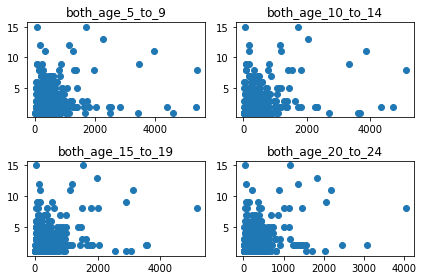

In [56]:
x_both = ['both_age_5_to_9', 'both_age_10_to_14', 'both_age_15_to_19', 'both_age_20_to_24']
subplot(x_both)

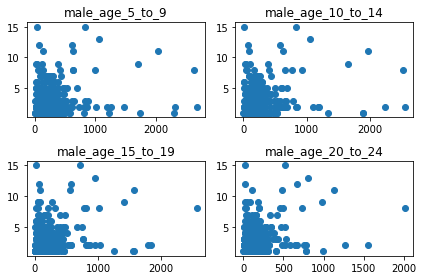

In [57]:
x_male = ['male_age_5_to_9', 'male_age_10_to_14', 'male_age_15_to_19', 'male_age_20_to_24']
subplot(x_male)

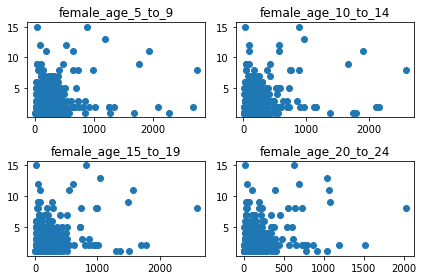

In [58]:
x_female = ['female_age_5_to_9', 'female_age_10_to_14', 'female_age_15_to_19', 'female_age_20_to_24']
subplot(x_female)

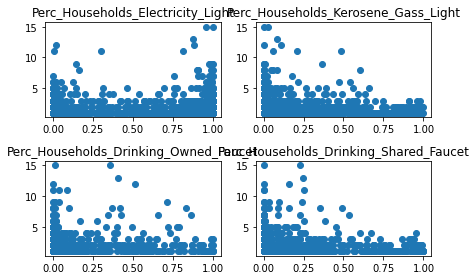

In [59]:
x_sgd = ['Perc_Households_Electricity_Light', 'Perc_Households_Kerosene_Gass_Light', 
         'Perc_Households_Drinking_Owned_Faucet', 'Perc_Households_Drinking_Shared_Faucet']
subplot(x_sgd)

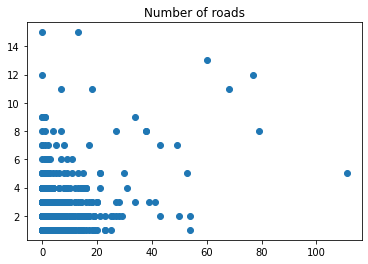

In [60]:
plt.scatter(dataset['number_of_roads'], y)
plt.title('Number of roads')
plt.show()

## 3. Preprocess data

### Train test split

In [61]:
training_data, testing_data = train_test_split(dataset, test_size=0.2, random_state=42)

In [62]:
X_train = training_data.drop(['No_of_Schools'], axis=1)
y_train = training_data['No_of_Schools']

X_test = testing_data.drop(['No_of_Schools'], axis=1)
y_test = testing_data['No_of_Schools']

### Normalization

In [63]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))

### Modelling

In [64]:
model = Sequential()
model.add(normalizer)
model.add(Dense(20, activation='tanh', input_dim=5, kernel_initializer='uniform'))
model.add(Dense(1, activation='linear', kernel_initializer='uniform'))

In [69]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [71]:
EPOCHS = 100
BATCH_SIZE = 10
history = model.fit(X_train, 
                    y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE,
                    validation_split=0.2)

Epoch 1/100
101/101 [==============================] - 0s 3ms/step - loss: 1.3661 - mse: 1.3661 - val_loss: 2.2395 - val_mse: 2.2395
Epoch 2/100
101/101 [==============================] - 0s 1ms/step - loss: 1.3122 - mse: 1.3122 - val_loss: 2.2874 - val_mse: 2.2874
Epoch 3/100
101/101 [==============================] - 0s 1ms/step - loss: 1.3364 - mse: 1.3364 - val_loss: 2.2617 - val_mse: 2.2617
Epoch 4/100
101/101 [==============================] - 0s 1ms/step - loss: 1.3198 - mse: 1.3198 - val_loss: 2.2465 - val_mse: 2.2465
Epoch 5/100
101/101 [==============================] - 0s 1ms/step - loss: 1.3253 - mse: 1.3253 - val_loss: 2.2789 - val_mse: 2.2789
Epoch 6/100
101/101 [==============================] - 0s 1ms/step - loss: 1.3246 - mse: 1.3246 - val_loss: 2.2457 - val_mse: 2.2457
Epoch 7/100
101/101 [==============================] - 0s 1ms/step - loss: 1.3208 - mse: 1.3208 - val_loss: 2.2488 - val_mse: 2.2488
Epoch 8/100
101/101 [==============================] - 0s 1ms/step - 

101/101 [==============================] - 0s 1ms/step - loss: 1.2768 - mse: 1.2768 - val_loss: 2.2980 - val_mse: 2.2980
Epoch 63/100
101/101 [==============================] - 0s 1ms/step - loss: 1.2625 - mse: 1.2625 - val_loss: 2.2703 - val_mse: 2.2703
Epoch 64/100
101/101 [==============================] - 0s 1ms/step - loss: 1.2630 - mse: 1.2630 - val_loss: 2.3591 - val_mse: 2.3591
Epoch 65/100
101/101 [==============================] - 0s 1ms/step - loss: 1.2889 - mse: 1.2889 - val_loss: 2.2812 - val_mse: 2.2812
Epoch 66/100
101/101 [==============================] - 0s 1ms/step - loss: 1.2478 - mse: 1.2478 - val_loss: 2.3297 - val_mse: 2.3297
Epoch 67/100
101/101 [==============================] - 0s 1ms/step - loss: 1.2545 - mse: 1.2545 - val_loss: 2.2813 - val_mse: 2.2813
Epoch 68/100
101/101 [==============================] - 0s 1ms/step - loss: 1.2563 - mse: 1.2563 - val_loss: 2.3566 - val_mse: 2.3566
Epoch 69/100
101/101 [==============================] - 0s 1ms/step - loss:

## 4. Model evaluation

In [72]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mse,val_loss,val_mse,epoch
95,1.230120,1.230120,2.294240,2.294240,95
96,1.235610,1.235610,2.276713,2.276713,96
97,1.225956,1.225956,2.313658,2.313658,97
98,1.221488,1.221488,2.286506,2.286506,98
99,1.211759,1.211759,2.288703,2.288703,99


In [76]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

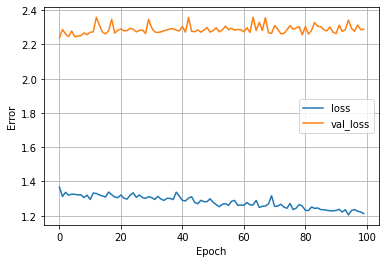

In [77]:
plot_loss(history)

##### TO DO:
1. Feature selection
2. Model evaluation (variance, loss)
3. Choose